In [6]:
import sys

sys.path.append('/Users/huberyhu/Desktop/SURP/im_deinfluence/model_code')

import networkx as nx
import experiment_framework as ef
import matplotlib.pyplot as plt
import copy

In [7]:
G = nx.erdos_renyi_graph(3000, 0.003)
model = ef.run_influence_cascade(G, num_influencers=20, steps=3, selection_method='random')

In [8]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 2551
Number of deinfluenced nodes: 0
Number of susceptible nodes: 449
influencer {2304, 2689, 1796, 1671, 1043, 1942, 1302, 2720, 1444, 2342, 422, 2599, 42, 2859, 2732, 426, 302, 2737, 2485, 822, 440, 1342, 2494, 448, 710, 1096, 1097, 2890, 2123, 2634, 1866, 590, 2383, 2896, 465, 2768, 2008, 90, 2269, 2405, 1773, 2286, 251, 2928, 1012, 633, 122, 379, 2685, 2430}


In [9]:
# Run simulation for different values of k
budget_list = list(range(1, 101))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'Degree': set()}), (2, {'Random': set(), 'Degree': set()}), (3, {'Random': {863}, 'Degree': set()}), (4, {'Random': {2454}, 'Degree': set()}), (5, {'Random': {632}, 'Degree': {909}}), (6, {'Random': {2237, 2655}, 'Degree': {909}}), (7, {'Random': {1656, 2802}, 'Degree': {909}}), (8, {'Random': {2192, 2953, 2103}, 'Degree': {909}}), (9, {'Random': {841, 2873, 1565}, 'Degree': {909}}), (10, {'Random': {969, 1117, 1965}, 'Degree': {909, 606}}), (11, {'Random': {2083, 2819, 133}, 'Degree': {909, 606}}), (12, {'Random': {778, 2068, 598, 1095}, 'Degree': {909, 606}}), (13, {'Random': {2440, 1618, 1614, 967}, 'Degree': {909, 606}}), (14, {'Random': {920, 692, 2917, 1108}, 'Degree': {1228, 909, 606}}), (15, {'Random': {1345, 171, 2669, 253, 2783}, 'Degree': {1228, 909, 606}}), (16, {'Random': {1568, 2467, 2059, 438, 537, 380}, 'Degree': {1228, 909, 606}}), (17, {'Random': {2689, 965, 269, 559, 692, 501}, 'Degree': {1228, 909, 606}}), (18, {'Random': {1928, 1484, 174, 264

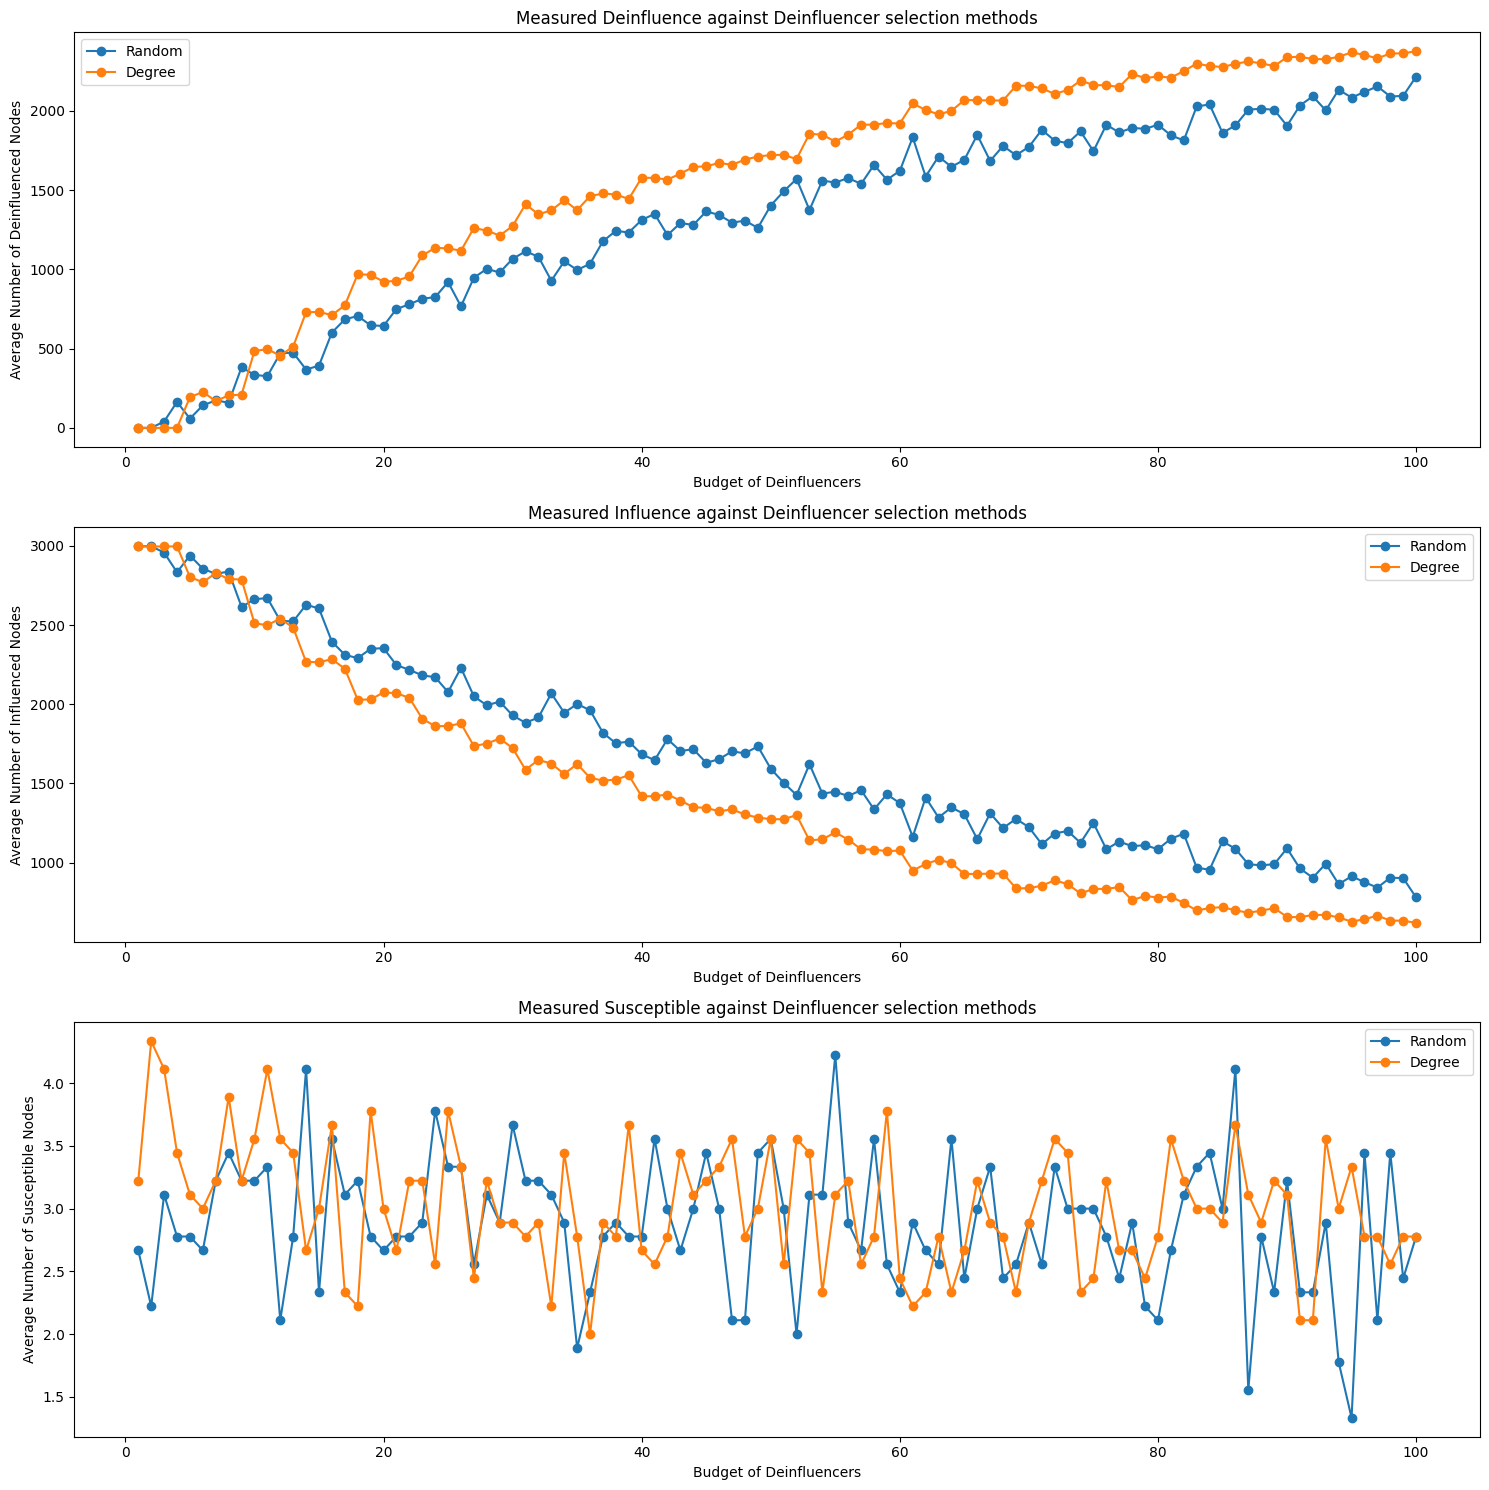

In [10]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [11]:
# Run simulation for different values of k
budget_list = list(range(1, 101))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'Degree': set()}), (2, {'Random': set(), 'Degree': set()}), (3, {'Random': set(), 'Degree': set()}), (4, {'Random': set(), 'Degree': set()}), (5, {'Random': set(), 'Degree': set()}), (6, {'Random': {1747}, 'Degree': set()}), (7, {'Random': set(), 'Degree': set()}), (8, {'Random': set(), 'Degree': set()}), (9, {'Random': set(), 'Degree': set()}), (10, {'Random': {1548}, 'Degree': set()}), (11, {'Random': {2939}, 'Degree': set()}), (12, {'Random': {677}, 'Degree': set()}), (13, {'Random': {2748}, 'Degree': set()}), (14, {'Random': {1239}, 'Degree': set()}), (15, {'Random': {1552}, 'Degree': set()}), (16, {'Random': {1322, 1132}, 'Degree': set()}), (17, {'Random': {652}, 'Degree': set()}), (18, {'Random': {487}, 'Degree': set()}), (19, {'Random': {2252, 2975}, 'Degree': set()}), (20, {'Random': {1246}, 'Degree': set()}), (21, {'Random': {201, 1862}, 'Degree': set()}), (22, {'Random': {1426, 221}, 'Degree': {909}}), (23, {'Random': {2745, 941}, 'Degree': {909}}), (24

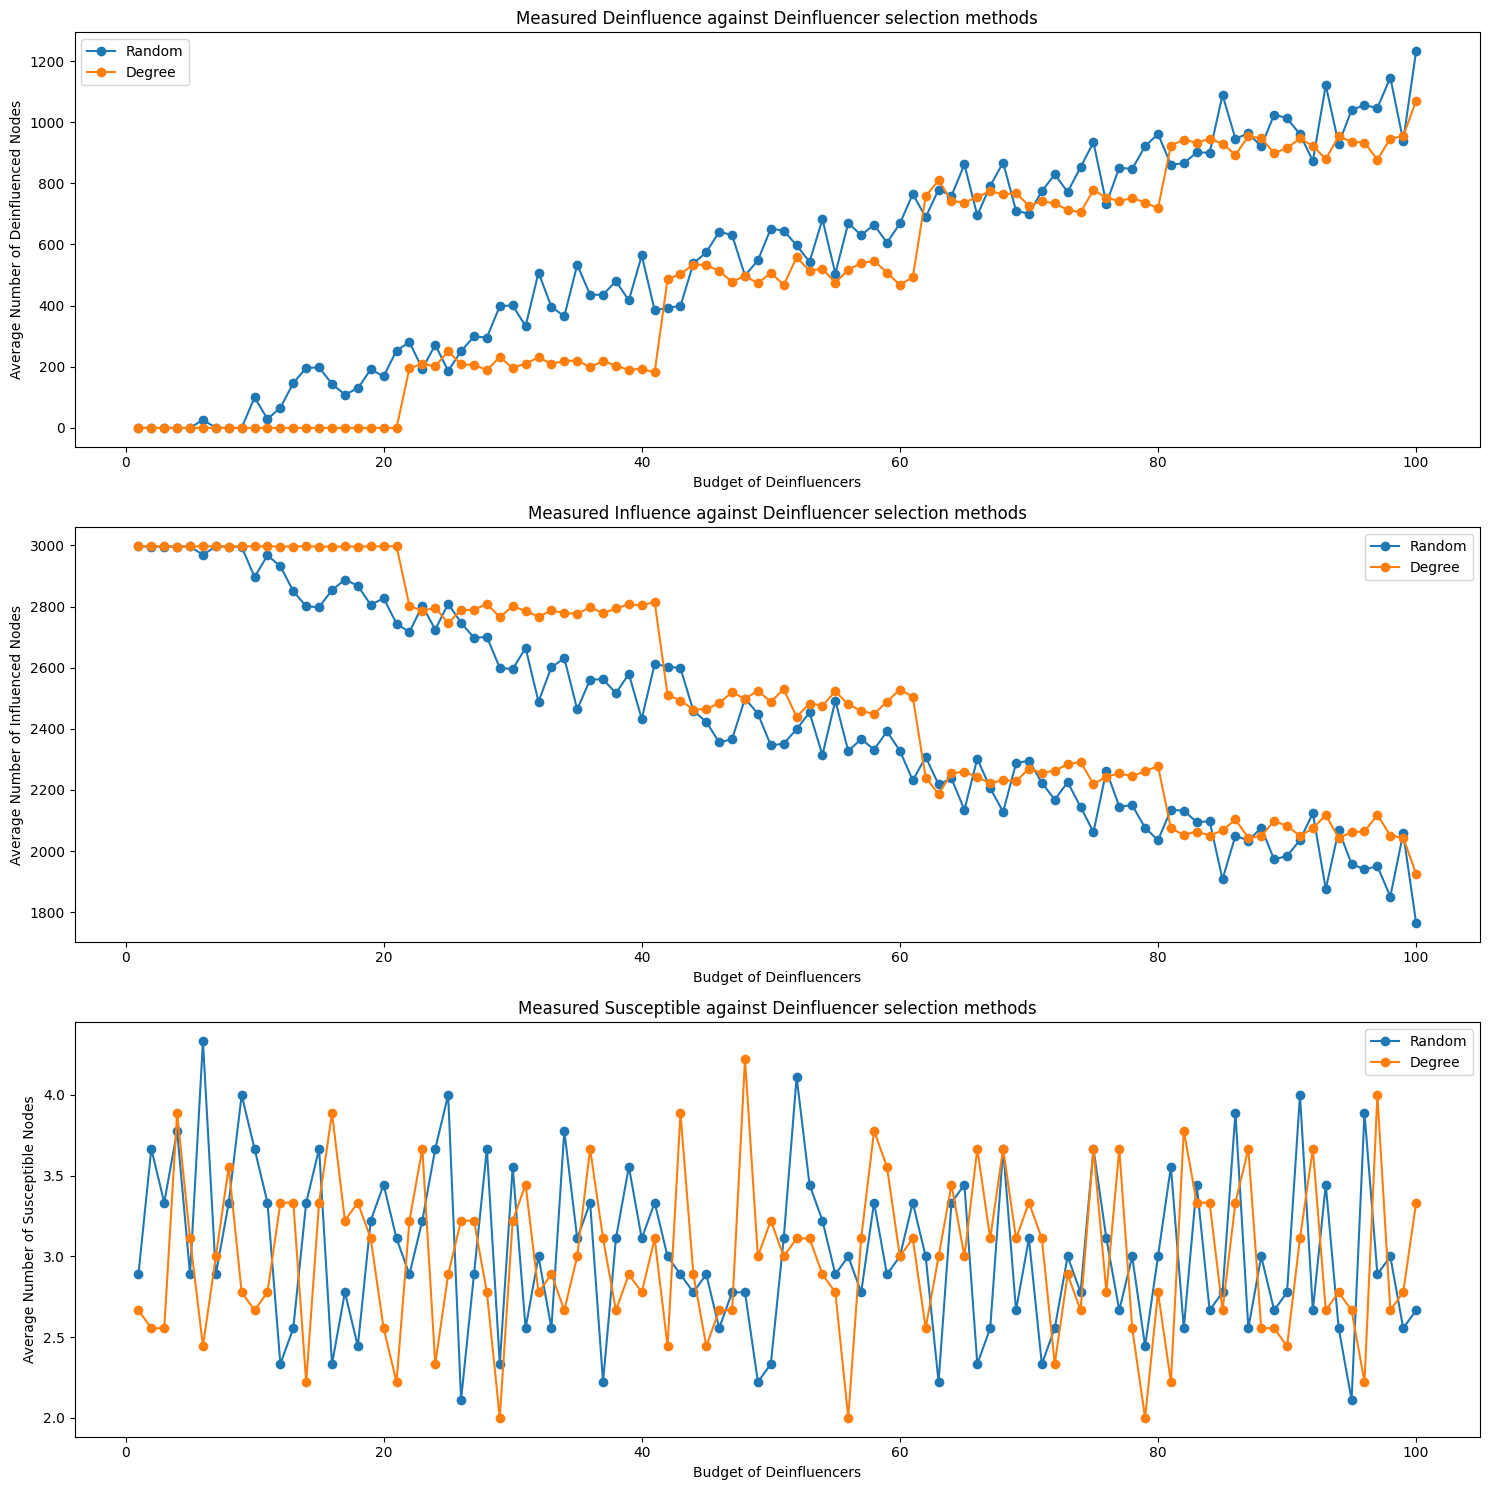

In [12]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [ ]:
# Run simulation for different values of k
budget_list = list(range(1, 101))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)